# compute ... 

 Here I'm doing ...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Report dates not available for UTSW
median = 226.0 days


Text(226.0, 15, '  Median: 7.5 months')

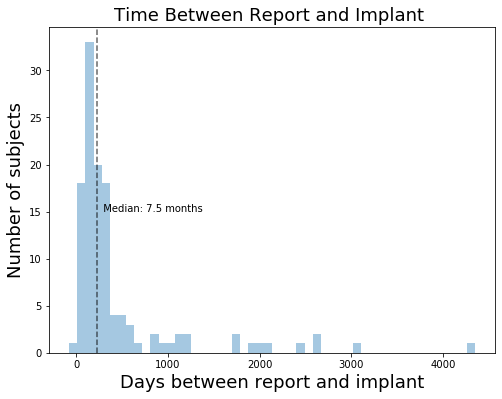

In [2]:
#Set to 'All' for aggregate data or a specific site name for site-only data
site = 'All'
sd = {'Jefferson', 'Dartmouth', 'Emory', 'UTSW'}

if (site != 'All'):
#     df = pd.read_excel(r'./' + site + '_neuropsych.xlsx')
    df = pd.read_excel(r'./' + site + '_neuropsych.xlsx',engine="openpyxl")
time_gap = []

#Will only include sites that have date of report extracted from REDCap
if site == 'All':
    for k in sd:
        try:
            df = pd.read_excel(r'./' + k + '_neuropsych.xlsx',engine="openpyxl")
            for i in df.index:
                gap = df.iloc[i]['Time between report and implant (days)']
                if np.isnan(gap)==False:
                    time_gap.append(gap)
        except:
            print('Report dates not available for', k)
else:
    for i in df.index:
        gap = df.iloc[i]['Time between report and implant (days)']
        if np.isnan(gap)==False:
            time_gap.append(gap)
    
mean = np.mean(time_gap)
med = np.median(time_gap)
    
plt.figure(figsize=(8,6))
time_hist = plt.hist(time_gap, 50,alpha=0.4)
plt.xlabel('Days between report and implant',fontsize=18)
plt.ylabel('Number of subjects',fontsize=18)
# plt.title('Time Between Report and Implant: '+ site,fontsize=18)
plt.title('Time Between Report and Implant ',fontsize=18)

# plt.axvline(x=mean, color='k', linestyle='--',alpha=0.5)
plt.axvline(x=med, color='k', linestyle='--',alpha=0.6)
# print('mean =', mean, 'days')
print('median =', med, 'days')
plt.text(med,15,'  Median: %.1f months' %(med/30))

mean = 11.785714285714286
median = 9.0
168 of 386 subjects have BAI = 0.43523316062176165
166 of 386 subjects have both scores = 0.43005181347150256


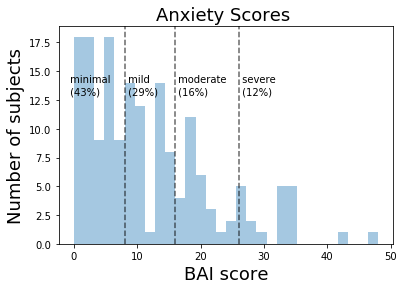

In [3]:
BAI = []
count = 0
both = 0
selected = 0
N = 0

if site == 'All':
    for k in sd:
        df = pd.read_excel(r'./' + k + '_neuropsych.xlsx',engine="openpyxl")
        for i in df.index:
            score = df.iloc[i]['BAI']
            if np.isnan(score)==False:
                BAI.append(df.iloc[i]['BAI'])
                count = count + 1
                if df.iloc[i]['BAI'] > 18:
                    selected = selected + 1
                if np.isnan(df.iloc[i]['BDI'])==False:
                    both = both + 1
        N = N + len(df.index)
else:
    for i in df.index:
        score = df.iloc[i]['BAI']
        if np.isnan(score)==False:
            BAI.append(df.iloc[i]['BAI'])
            count = count + 1
            if df.iloc[i]['BAI'] > 18:
                    selected = selected + 1
            if np.isnan(df.iloc[i]['BDI'])==False:
                both = both + 1
    N = len(df.index)
    
mean = np.mean(BAI)
med = np.median(BAI)
ratio = float(count/N)
brat = float(both/N)
    
time_hist = plt.hist(BAI, 30,alpha=0.4)
plt.xlabel('BAI score',fontsize=18)
plt.ylabel('Number of subjects',fontsize=18)
# plt.title('Anxiety Scores: '+ site,fontsize=18)
plt.title('Anxiety Scores ',fontsize=18)

# plt.axvline(x=mean, color='k', linestyle='--')
print('mean =', mean)
print('median =', med)
print(count, 'of', N, 'subjects have BAI =', ratio)
print(both, 'of', N, 'subjects have both scores =', brat)
selected

# cutoffs
mild=8
moderate=16
severe=26

min_perc=(np.sum(np.logical_and(np.array(BAI)>=0,np.array(BAI)<mild))/len(BAI))*100
mild_perc=(np.sum(np.logical_and(np.array(BAI)>=mild,np.array(BAI)<moderate))/len(BAI))*100
moderate_perc=(np.sum(np.logical_and(np.array(BAI)>=moderate,np.array(BAI)<severe))/len(BAI))*100
severe_perc=(np.sum(np.array(BAI)>=severe)/len(BAI))*100

plt.text(-1,13,' minimal \n (%.0f%%)' %min_perc)
plt.text(mild,13,' mild \n (%.0f%%)' %mild_perc)
plt.text(moderate,13,' moderate \n (%.0f%%)' %moderate_perc)
plt.text(severe,13,' severe \n (%.0f%%)' %severe_perc)
plt.axvline(mild, color='k', linestyle='--',alpha=0.6)
plt.axvline(moderate, color='k', linestyle='--',alpha=0.6)
plt.axvline(severe, color='k', linestyle='--',alpha=0.6)



mean = 14.103260869565217
median = 11.0
184 of 386 subjects have BDI = 0.43523316062176165


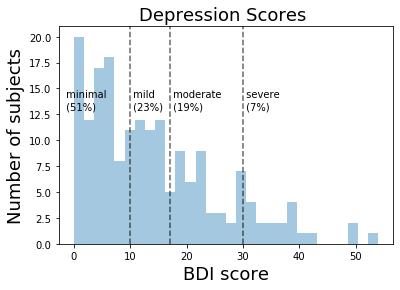

In [4]:
BDI = []
count = 0
N = 0
selected = 0

if site == 'All':
    for k in sd:
        df = pd.read_excel(r'./' + k + '_neuropsych.xlsx',engine="openpyxl")
        for i in df.index:
            score = df.iloc[i]['BDI']
            if np.isnan(score)==False:
                BDI.append(df.iloc[i]['BDI'])
                count = count + 1
                if df.iloc[i]['BDI'] > 16:
                    selected = selected + 1
        N = N + len(df.index)
else:
    for i in df.index:
        score = df.iloc[i]['BDI']
        if np.isnan(score)==False:
            BDI.append(df.iloc[i]['BDI'])
            count = count + 1
            if df.iloc[i]['BDI'] > 16:
                    selected = selected + 1
                    
mean = np.mean(BDI)
med = np.median(BDI)
#ratio = float(count/N)
    
time_hist = plt.hist(BDI, 30,alpha=0.4)
plt.xlabel('BDI score',fontsize=18)
plt.ylabel('Number of subjects',fontsize=18)
# plt.title('Depression Scores: '+ site,fontsize=18)
plt.title('Depression Scores ',fontsize=18)


# plt.axvline(x=mean, color='k', linestyle='--')
# plt.axvline(x=med, color='r', linestyle='--')
print('mean =', mean)
print('median =', med)
print(count, 'of', N, 'subjects have BDI =', ratio)
selected

# scores from 0 to 9 represent minimal depressive symptoms, scores of 10 to 16 indicate mild depression, scores of 17 to 29 indicate moderate depression, and scores of 30 to 63 indicate severe depression.
# cutoffs
mild=10
moderate=17
severe=30

min_perc=(np.sum(np.logical_and(np.array(BAI)>=0,np.array(BAI)<mild))/len(BAI))*100
mild_perc=(np.sum(np.logical_and(np.array(BAI)>=mild,np.array(BAI)<moderate))/len(BAI))*100
moderate_perc=(np.sum(np.logical_and(np.array(BAI)>=moderate,np.array(BAI)<severe))/len(BAI))*100
severe_perc=(np.sum(np.array(BAI)>=severe)/len(BAI))*100

plt.text(-2,13,' minimal \n (%.0f%%)' %min_perc)
plt.text(mild,13,' mild \n (%.0f%%)' %mild_perc)
plt.text(moderate,13,' moderate \n (%.0f%%)' %moderate_perc)
plt.text(severe,13,' severe \n (%.0f%%)' %severe_perc)
plt.axvline(mild, color='k', linestyle='--',alpha=0.6)
plt.axvline(moderate, color='k', linestyle='--',alpha=0.6)
plt.axvline(severe, color='k', linestyle='--',alpha=0.6)



In [5]:
norep = []
oldrep = []

df
for i in df.index:
    typ = df.iloc[i]['Type of report']
    gap = df.iloc[i]['Time between report and implant (days)']
    if typ=='None':
        norep.append(df.iloc[i]['Subject Number'])
    if gap > 182:
        oldrep.append(df.iloc[i]['Subject Number'])
len(oldrep)

KeyError: 'Type of report'

### Compute Pearson correlation between anxiety and depression

LR test, 0.688, p value:, 0.00000035, N = 43


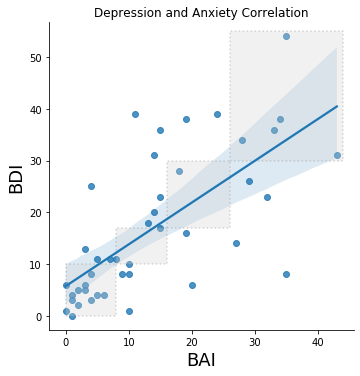

In [45]:
import seaborn as sns
df=df.dropna(subset=['BDI', 'BAI']) # drop nans

sns.lmplot(x="BAI", y="BDI", data=df);
plt.xlabel("BAI",fontsize=18)
plt.ylabel("BDI",fontsize=18);
plt.title("Depression and Anxiety Correlation")

# correlation:
from scipy import stats
r,p=stats.pearsonr(df['BAI'], df['BDI'])
print('LR test, {:.3f}, p value:, {:.8f}, N = {:.0f}'.format(r, p, len(df)))

# Anxiety cutoffs
mild=8
moderate=16
severe=26
# Depression cutoffs
mild=10
moderate=17
severe=30

rect = plt.Rectangle((26,30),max(df['BAI'])-25,max(df['BDI'])-29,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # severe cases
rect1 = plt.Rectangle((16,17),26-16,30-17,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # moderate cases
rect2 = plt.Rectangle((8,10),16-8,17-10,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # mild cases
rect3 = plt.Rectangle((0,0),8,10,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # without depression/anxiety

# Add the patch to the Axes
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)


### Check if anxiety predicts intrusions beyond depression using lmm

In [10]:
% cd /home1/noaherz/Mental_health3/
from imports import *

/home1/noaherz/Mental_health3


/home1/noaherz/.conda/envs/cml3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home1/noaherz/.conda/envs/cml3/lib/python3.7/site-packages/ptsa/data/timeseries.py:487: FutureWarning: xarray subclass TimeSeriesX should explicitly define __slots__
  class TimeSeriesX(TimeSeries):


In [11]:
# load
import pickle
with open('/home1/noaherz/Mental_health/results/df_master','rb') as pickle_file:
    df_master=pickle.load(pickle_file)


In [12]:
df_master=df_master.dropna(subset=['BDI', 'BAI'])
len(df_master)

401

In [13]:
len(df_master['subject'].unique())

120

In [15]:
sub_level_df = pd.DataFrame([]) 
for sub in df_master['subject'].unique():
    sub_data = df_master[df_master['subject']==sub]
    assert np.max(sub_data['BAI']) == np.min(sub_data['BAI']) # Check if all items in the array are equal
    assert np.max(sub_data['BDI']) == np.min(sub_data['BDI'])
    sub_level_df=sub_level_df.append({'subject': sub_data.iloc[0]['subject'], 'BDI':sub_data.iloc[0]['BDI'], 'BAI':sub_data.iloc[0]['BAI']},ignore_index=True )


LR test, 0.530, p value:, 0.00000000, N = 120


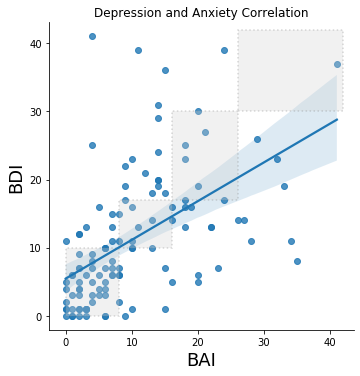

In [17]:

sns.lmplot(x="BAI", y="BDI", data=sub_level_df);
plt.xlabel("BAI",fontsize=18)
plt.ylabel("BDI",fontsize=18);
plt.title("Depression and Anxiety Correlation")

# correlation:
from scipy import stats
r,p=stats.pearsonr(sub_level_df['BAI'], sub_level_df['BDI'])
print('LR test, {:.3f}, p value:, {:.8f}, N = {:.0f}'.format(r, p, len(sub_level_df)))

# Anxiety cutoffs
mild=8
moderate=16
severe=26
# Depression cutoffs
mild=10
moderate=17
severe=30

rect = plt.Rectangle((26,30),max(sub_level_df['BAI'])-25,max(sub_level_df['BDI'])-29,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # severe cases
rect1 = plt.Rectangle((16,17),26-16,30-17,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # moderate cases
rect2 = plt.Rectangle((8,10),16-8,17-10,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # mild cases
rect3 = plt.Rectangle((0,0),8,10,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # without depression/anxiety

# Add the patch to the Axes
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)


Anxiety predicts intrusions beyond depression, but not the otherway around

In [24]:
# what's the difference between: df_master[['average_total_ints','total ints']]

vc = {'session': '0 + C(session)'} #the vc formula always varies within the groups parameter, so it will vary within subject 
# If we want to use list as another nested variable, we can use this:
# vc = {'session': '0 + C(session)', 'list': '0 + C(list):C(session)'}

## Total number of intrusions:
model = sm.MixedLM.from_formula('average_total_ints ~ BDI',vc_formula=vc,  groups='subject', data=df_master) 
result=model.fit(reml=False, method='nm')
llf_one_var =result.llf #log likelihood
print(result.summary())

# Experiment main effect
model = sm.MixedLM.from_formula('average_total_ints ~ BDI + BAI',vc_formula=vc, groups='subject', data=df_master) 
result=model.fit(reml=False, method='nm')
llf_full =result.llf #log likelihood
print(result.summary())

# Likelihood ratio tests for main effects
print('Main effect of anxiety on total intrusions')
lr, p = lrtest(llf_one_var, llf_full, df = 1) # Degrees of freedom = number of regressors (i.e. columns in summary table) added when including the effect of interest, for categorical variable with two groups this is df = 1
print('LR test, p value: {:.4f}, {:.30f}'.format(lr, p))

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: average_total_ints
No. Observations: 401     Method:             ML                
No. Groups:       120     Scale:              0.2375            
Min. group size:  1       Log-Likelihood:     -484.8649         
Max. group size:  10      Converged:          Yes               
Mean group size:  3.3                                           
------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept      0.935      0.071   13.114   0.000    0.795    1.074
BDI            0.006      0.005    1.218   0.223   -0.004    0.016
session Var    0.483      0.284                                   

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: average_total_ints
No. Observations: 401     Method:       

Both anxiety and depression uniquly predict correct-recalls

In [30]:
# what's the difference between: df_master[['average_total_ints','total ints']]

vc = {'session': '0 + C(session)'} #the vc formula always varies within the groups parameter, so it will vary within subject 
# If we want to use list as another nested variable, we can use this:
# vc = {'session': '0 + C(session)', 'list': '0 + C(list):C(session)'}

## Total number of intrusions:
model = sm.MixedLM.from_formula('average_total_recalls ~ BDI',vc_formula=vc,  groups='subject', data=df_master) 
result=model.fit(reml=False, method='nm')
llf_one_var =result.llf #log likelihood
print(result.summary())

# Experiment main effect
model = sm.MixedLM.from_formula('average_total_recalls ~ BDI + BAI',vc_formula=vc, groups='subject', data=df_master) 
result=model.fit(reml=False, method='nm')
llf_full =result.llf #log likelihood
print(result.summary())

# Likelihood ratio tests for main effects
print('Main effect of anxiety on correct recalls')
lr, p = lrtest(llf_one_var, llf_full, df = 1) # Degrees of freedom = number of regressors (i.e. columns in summary table) added when including the effect of interest, for categorical variable with two groups this is df = 1
print('LR test, p value: {:.4f}, {:.30f}'.format(lr, p))

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: average_total_recalls
No. Observations: 401     Method:             ML                   
No. Groups:       120     Scale:              2.6532               
Min. group size:  1       Log-Likelihood:     -795.6549            
Max. group size:  10      Converged:          Yes                  
Mean group size:  3.3                                              
---------------------------------------------------------------------
                 Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
---------------------------------------------------------------------
Intercept         5.051      0.141   35.708   0.000    4.774    5.328
BDI              -0.010      0.010   -0.988   0.323   -0.029    0.010
session Var       0.454      0.367                                   

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: average_total_recal